In [1]:
using Revise

In [4]:
using PyCall, PyPlot, Statistics
using ClimateMARGO

In [5]:
using ClimateMARGO.Models
using ClimateMARGO.Diagnostics
using ClimateMARGO.Optimization
using ClimateMARGO.Plotting

In [6]:
m = deepcopy(ClimateModel(ClimateMARGO.IO.included_configurations["default"]))
m.economics.mitigate_cost *= 1.5
m.economics.remove_cost /= 2.
m.economics.geoeng_cost *= 4.
@time optimize_controls!(m);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Solve_Succeeded
 29.169568 seconds (50.33 M allocations: 2.502 GiB, 3.91% gc time)


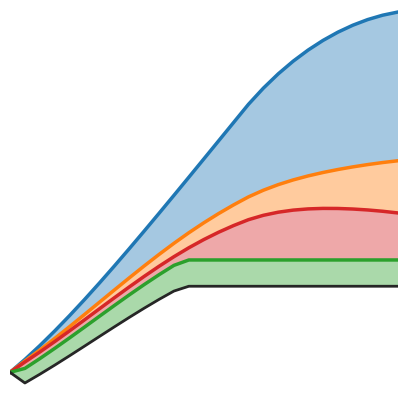

In [7]:
figure(figsize=(5,5))

fill_between(t(m), T(m), T(m, M=true), color="C0", alpha=0.4)
fill_between(t(m), T(m, M=true), T(m, M=true, R=true), color="C1", alpha=0.4)
fill_between(t(m), T(m, M=true, R=true), T(m, M=true, R=true, G=true), color="C3", alpha=0.4)
fill_between(t(m), T(m, M=true, R=true, G=true), T(m,  M=true, R=true, G=true, A=true), color="C2", alpha=0.4)
plot(t(m), T(m), "C0", lw=2.5)
plot(t(m), T(m, M=true), "C1", lw=2.5)
plot(t(m), T(m, M=true, R=true), "C3", lw=2.5)
plot(t(m), T(m, M=true, R=true, G=true), "C2", lw=2.5)
plot(t(m), T(m, M=true, R=true, G=true, A=true), color=(0.15,0.15,0.15), lw=2)


xlim([2020, 2150])
ylim([1, 4.54])
xlabel("")
xticks([])
yticks([])
ylabel("")

gca().set_axis_off()
savefig("figures/ClimateMARGO_logo.png", dpi=200, bbox_inches="tight", pad_inches=0.)